# Uhul Store: Departamento de Festas e Celebrações

Festas e celebrações são momentos ideais para comemorarmos conquistas ou para reunirmos a família, amigos e demais pessoas que compõem o nosso ciclo social. A loja Uhul Store é uma loja e-commerce voltada à venda de produtos de festas e comemorações especiais.

Entre o final do ano de 2018 e o início do ano de 2019 foi implementada uma nova plataforma de vendas, para ampliar a margem de lucro do negócio. Os sócios e gestores identificaram um aumento expressivo no número de vendas, porém requisitaram que observemos os números por meio de uma análise dos dados, com visualizações gráficas e aplicação de hipóteses para estudar os diferentes grupos de usuários que utilizam o sistema.

Logo de início, fomos informados que o banco de dados contém um enorme conjunto de dados, com alguns problemas de registro nas informações. Dessa forma, antes de analisarmos o material, teremos de investigar e tratar os dados problemáticos, com o intuito de apresentar ao nosso cliente uma representação fidedigna do uso da plataforma e um modelo final refinado, gerando mais confiança sobre os números da análise geral e nas conclusões obtidas pelo estudo em tela.

Dashboard: https://public.tableau.com/app/profile/yuri.barbalho/viz/UhulStore/Dashboard

---

## 1. Importando os dados

Inicialmente, importaremos as bilbiotecas e dados da análise, para que tenhamos uma visão geral sobre as informações presentes no conjunto de dados.

In [1]:
# Importa as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importa o conjunto de dados. A separação dos dados é feita por tabulação.
df = pd.read_csv('./datasets/ecommerce_dataset_us.csv', sep='\t')

In [3]:
# Visão geral dos dados
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [4]:
# Informações gerais sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Em uma análise básica dos dados, notamos que alguns deles contêm formatos divergentes ao ideal para o prosseguimento do estudo. Ademais, percebemos que algumas colunas contêm valores ausentes.

---

## 2. Pré-processamento e tratamento dos dados

Inicialmente, iremos padronizar o preenchimento das colunas que contêm caracteres. Esses caracteres podem constar no conjunto de dados como maiúsculos ou minúsculos, fazendo com que nosso código interprete informações idênticas como diferentes, por conta da formatação. Portanto, faremos com que todas as colunas que apresentam caracteres estejam no formato maiúsculo.

In [5]:
# Padroniza a coluna para o formato maiúsculo e remove espaços antes e depois da string.
df['InvoiceNo'] = df['InvoiceNo'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].str.upper()

In [6]:
df['StockCode'] = df['StockCode'].str.strip()
df['StockCode'] = df['StockCode'].str.upper()

In [7]:
df['Description'] = df['Description'].str.strip()
df['Description'] = df['Description'].str.upper()

In [8]:
# Verifica registros com Description nulo.
df[df['Description'].isna()]['StockCode'].value_counts().head()

StockCode
35965    10
23084    10
22084     9
22451     6
22501     5
Name: count, dtype: int64

Alguns elementos do conjunto de dados não possuem o valor de `Description`, mas apresentam a identificação do produto em `StockCode`. Como outras colunas com o mesmo `StockCode` possuem o valor referente a `Description`, podemos mapear essa informação de modo a atribuir a descrição correta para os registros com essa informação ausente, por meio do identificador.

In [9]:
# Mapeando os StockCode cuja Description não esteja vazia. Utilizaremos a informação para preencher a Description vazia dos respectivos StockCode.
mapping = df.loc[df['Description'].notna()].drop_duplicates('StockCode').set_index('StockCode')['Description']
mapping.head()

StockCode
85123A     WHITE HANGING HEART T-LIGHT HOLDER
71053                     WHITE METAL LANTERN
84406B         CREAM CUPID HEARTS COAT HANGER
84029G    KNITTED UNION FLAG HOT WATER BOTTLE
84029E         RED WOOLLY HOTTIE WHITE HEART.
Name: Description, dtype: object

In [10]:
# Atribui Description com base no mapeamento de StockCode.
df['Description'] = df['Description'].fillna(df['StockCode'].map(mapping))

Acima foi gerada uma `Series` com base nos valores não-ausentes de `Description`, sobre os quais ignoramos o `StockCode` duplicado, definimos o código como índice da `Series` e obtivemos a respectiva `Description` para aquele identificador. Com esses dados em mãos, podemos percorrer o conjunto de dados preenchendo registros nulos em `Description` com a descrição correspondente informada no mapeamento de `StockCode`.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541799 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [12]:
# Verifica quantidades negativas de produtos.
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,DISCOUNT,-1,11/29/2018 09:41,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,11/29/2018 09:49,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,11/29/2018 10:24,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,11/29/2018 10:24,0.29,17548.0


In [13]:
# Itens únicos com quantidade negativa
df[df['Quantity']<0]['InvoiceNo'].nunique()

5172

Nosso conjunto de dados contém 5.172 registros que informam uma quantidade negativa de produtos vendidos. Esse registro negativo pode se tratar tanto de um erro na informação, quanto da devolução de produtos. Como não podemos prever sua representação, iremos remover tais informações da nossa tabela.

In [14]:
# Remove itens com a quantidade negativa de produtos.
df = df[(~df['InvoiceNo'].isin(df[df['Quantity']<0]['InvoiceNo']))]

Como observado anteriormente, a coluna `CustomerID` possui uma ausência notável de valores de identificação dos clientes. No entanto, essas informações podem ser importantes para a análise geral dos dados.

A princípio, atribuíremos um valor `zero` para manter as informações desses clientes no nosso conjunto de dados. Porém, no decorrer a análise necessitaremos remover tais registros, pois um identificador único para todos eles pode interferir na análise do perfil de comportamento de clientes únicos.

In [15]:
# Preenche com 0 (zero) os valores vazios de ID do cliente.
df['CustomerID'] = df['CustomerID'].fillna(0)

In [16]:
# Converte os valores das colunas para inteiro.
df['Quantity'] = df['Quantity'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  531272 non-null  object 
 3   Quantity     531285 non-null  int32  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   531285 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 28.4+ MB


Registramos 531.285 linhas totais no conjunto de dados, sendo que a coluna `Description` contém 531.272 dados preenchidos. Devido à ínfima diferença entre os números, vamos remover os registros que contêm valores nulos para essa coluna, evitando que interfiram na execução da análise.

In [18]:
# Remove registros que contenham valores nulos.
df.dropna(inplace=True)

Tratados os valores ausentes, iremos por fim remover possíveis itens duplicados que estejam presentem no nosso conjunto de dados.

In [19]:
# Remove valores duplicados.
df = df.drop_duplicates()

### 2.1 Ajustando as informações

Finalizada a remoção dos valores ausentes e duplicados, iremos a partir de agora realizar o tratamento dos dados restantes no conjunto de dados, garantindo que as informações presentes sejam identificadas de forma idônea e clara dentro de nossa análise

In [20]:
# Converte a coluna para o tipo datetime.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [21]:
# Cria a coluna de preço total do registro.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526041 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526041 non-null  object        
 1   StockCode    526041 non-null  object        
 2   Description  526041 non-null  object        
 3   Quantity     526041 non-null  int32         
 4   InvoiceDate  526041 non-null  datetime64[ns]
 5   UnitPrice    526041 non-null  float64       
 6   CustomerID   526041 non-null  int32         
 7   TotalPrice   526041 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 32.1+ MB


Inicialmente, convertemos a coluna `InvoiceDate` para o formato `datetime`, de modo que possamos obter informações específicas sobre o dia e horário da compra. Além disso, criamos a coluna `TotalPrice`, que identifica o preço total constante no registro, multiplicando a quantidade de itens pelo preço unitário de cada um.

In [23]:
# Cria uma coluna com a data da compra.
df['Date'] = df['InvoiceDate'].dt.floor('D')

In [24]:
# Cria uma coluna com o horário da compra.
df['Hour'] = df['InvoiceDate'].dt.hour

In [25]:
# Remove a coluna geral de data e horário de compra.
df = df.drop('InvoiceDate', axis=1)

In [26]:
# Cria uma coluna com o dia da semana da compra.
df['WeekDay'] = df['Date'].dt.weekday

In [27]:
# Cria uma coluna com o mês e ano da compra.
df['Month'] = df['Date'].dt.to_period('M')

Referente à informação de datas, produzimos quatro novas colunas, cada uma contendo uma informação específica sobre a data da compra. A coluna `Date` mantém o registro do dia da compra, e a coluna `Hour` o registro do horário. `WeekDay` identifica o dia da semana em que a compra foi realizada, e `Month` registra o mês e o ano da compra.

Com essas informações separadas em colunas, não há necessidade de mantermos uma coluna única contendo todos esses registros. Portanto, removemos a coluna `InvoiceDate` do nosso conjunto de dados, para simplificarmos as informações presentes.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526041 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526041 non-null  object        
 1   StockCode    526041 non-null  object        
 2   Description  526041 non-null  object        
 3   Quantity     526041 non-null  int32         
 4   UnitPrice    526041 non-null  float64       
 5   CustomerID   526041 non-null  int32         
 6   TotalPrice   526041 non-null  float64       
 7   Date         526041 non-null  datetime64[ns]
 8   Hour         526041 non-null  int32         
 9   WeekDay      526041 non-null  int32         
 10  Month        526041 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int32(4), object(3), period[M](1)
memory usage: 40.1+ MB


### 2.2 Identificação e remoção de mecanismos financeiros

In [29]:
# Ordena os dados por TotalPrice (crescente).
df.sort_values('TotalPrice').head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
299983,A563186,B,ADJUST BAD DEBT,1,-11062.06,0,-11062.06,2019-08-10,14,5,2019-08
299984,A563187,B,ADJUST BAD DEBT,1,-11062.06,0,-11062.06,2019-08-10,14,5,2019-08
138902,548220,79321,CHILLI LIGHTS,14,0.00,0,0.00,2019-03-28,9,3,2019-03
104448,545176,22473,TV DINNER TRAY VINTAGE PAISLEY,1,0.00,0,0.00,2019-02-26,14,1,2019-02
140198,548379,20702,PINK PADDED MOBILE,11,0.00,0,0.00,2019-03-28,16,3,2019-03


Em `TotalPrice`, ainda podemos observar a presença de valores negativos referentes a mecanismos financeiros constantes no conjunto de dados, além de valores zerados por conta da ausência de dados em `UnitPrice`. Dessa forma, prosseguiremos tratando os dados e removendo esses registros.

In [30]:
# Remove valores com TotalPrice zerado ou negativo.
df = df[df['TotalPrice']>0]

In [31]:
# Ordena os dados por UnitPrice.
df.sort_values('UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
15017,537632,AMAZONFEE,AMAZON FEE,1,13541.33,0,13541.33,2018-12-05,15,2,2018-12
299982,A563185,B,ADJUST BAD DEBT,1,11062.06,0,11062.06,2019-08-10,14,5,2019-08
173382,551697,POST,POSTAGE,1,8142.75,16029,8142.75,2019-05-01,13,2,2019-05
297723,562955,DOT,DOTCOM POSTAGE,1,4505.17,0,4505.17,2019-08-09,10,4,2019-08
268028,560373,M,MANUAL,1,4287.63,0,4287.63,2019-07-16,12,1,2019-07


Observamos que alguns `StockCode` se comportam de maneira diferente. `AmazonFee`, `B`, `Post` e `Dot`, por exemplo, são identificadores para soluções específicas da plataforma ou mecanismos financeiros, que não interessam para a transação dos itens. Dessa forma, iremos identificar e remover essas informações do conjunto de dados, para que esse esteja precisamente preenchido apenas com informações referentes aos itens em disposição na plataforma.

Para tanto, criaremos um **regex** para identificar os registros de `StockCode` que contenham um caractere de início.

In [32]:
# Importa a biblioteca regex.
import re

# Identifica o StockCode que combina com o regex (não começa com um dígito).
df[df['StockCode'].str.match(re.compile(r'^[^\d]'))]['StockCode'].value_counts().head(10)

StockCode
POST            1126
DOT              706
M                317
C2               141
DCGSSGIRL         13
BANK CHARGES      12
DCGSSBOY          11
GIFT_0001_20       9
GIFT_0001_10       8
GIFT_0001_30       7
Name: count, dtype: int64

In [33]:
'''
Remove registros em que StockCode não começa com um dígito.

Em geral, StockCodes que não começam com dígitos são referentes a serviços especiais da plataforma, como taxas de entrega ou bancárias, 
ou até mesmo descrições inseridas fora do campo correto.
'''
df = df[~df['StockCode'].str.match(re.compile(r'^[^\d]'))]

### 2.3 Remoção de outliers (cálculo de z_score)

In [34]:
# Ordena os dados por TotalPrice.
df.sort_values('TotalPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446,168469.60,2019-12-07,9,5,2019-12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346,77183.60,2019-01-16,10,2,2019-01
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,15098,38970.00,2019-06-08,15,5,2019-06
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,17450,7144.72,2019-09-18,11,2,2019-09
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,15749,6539.40,2019-01-09,12,2,2019-01


Ao ordenarmos o conjunto de dados pelo preço total da venda dos itens, encontramos valores completamente divergentes aos observados no modelo geral dos dados. Portanto, podemos aferir que existem **outliers** no nosso banco de dados, dados muito superiores ou inferiores aos padrões do conjunto, que podem por si próprios interferir nos números da análise.

Dessa maneira, prosseguiremos com o tratamento desses dados e os removeremos utilizando a ferramenta **z_score**, com base no `TotalPrice` dos produtos.

In [35]:
# Importa a biblioteca stats.
from scipy import stats as st

# Remove os valores que contenham z_score igual ou maior que 3.
outliers_removed = df[(np.abs(st.zscore(df['TotalPrice'])) < 3)].drop_duplicates()

In [36]:
# Ordena os dados por Quantity (crescente).
outliers_removed.sort_values('Quantity', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
270885,560599,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,3186,0.06,14609,191.16,2019-07-17,17,2,2019-07
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,0.18,16754,518.40,2018-11-30,17,4,2018-11
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,0.21,16333,544.32,2019-02-01,10,4,2019-02
91772,544152,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,2400,0.06,14609,144.00,2019-02-14,12,3,2019-02
125282,547037,21967,PACK OF 12 SKULL TISSUES,2160,0.25,14101,540.00,2019-03-18,10,0,2019-03


In [37]:
# Ordena os dados por UnitPrice (crescente).
outliers_removed.sort_values('UnitPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.5,15098,649.5,2019-06-08,15,5,2019-06
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,295.0,14973,295.0,2019-04-26,12,4,2019-04
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,295.0,16607,295.0,2018-12-14,8,4,2018-12
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,295.0,17406,295.0,2019-01-08,14,1,2019-01
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,295.0,13145,295.0,2018-11-30,18,4,2018-11


In [38]:
# Ordena os dados por TotalPrice (crescente).
outliers_removed.sort_values('TotalPrice', ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
378343,569647,22722,SET OF 6 SPICE TINS PANTRY DESIGN,240,3.45,12415,828.0,2019-10-03,12,3,2019-10
361893,568391,22193,RED DINER WALL CLOCK,108,7.65,17788,826.2,2019-09-25,10,2,2019-09
121859,546789,85099C,JUMBO BAG BAROQUE BLACK WHITE,500,1.65,15769,825.0,2019-03-15,10,4,2019-03
121858,546789,21928,JUMBO BAG SCANDINAVIAN BLUE PAISLEY,500,1.65,15769,825.0,2019-03-15,10,4,2019-03
121854,546789,22385,JUMBO BAG SPACEBOY DESIGN,500,1.65,15769,825.0,2019-03-15,10,4,2019-03


Nas colunas `Quantity`, `UnitPrice` e, consequentemente, `TotalPrice`, podemos observar que seus valores agora se comportam de maneira padronizada, refletindo o que uma grande distribuição de compras deveria informar sobre o conjunto de dados.

In [39]:
# Copia as informações para a tabela final.
df_final = outliers_removed.copy()
df_final.shape

(522046, 11)

In [40]:
# Exibe informações da tabela final.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522046 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    522046 non-null  object        
 1   StockCode    522046 non-null  object        
 2   Description  522046 non-null  object        
 3   Quantity     522046 non-null  int32         
 4   UnitPrice    522046 non-null  float64       
 5   CustomerID   522046 non-null  int32         
 6   TotalPrice   522046 non-null  float64       
 7   Date         522046 non-null  datetime64[ns]
 8   Hour         522046 non-null  int32         
 9   WeekDay      522046 non-null  int32         
 10  Month        522046 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int32(4), object(3), period[M](1)
memory usage: 39.8+ MB


In [41]:
# Salva as informações da tabela final em um novo arquivo csv.
df_final.to_csv('./datasets/ecommerce_dataset_us_final.csv', index=False)

Em síntese, concluímos a etapa de pré-processamento e tratamento dos dados, com um total de 522.046 registros distribuídos em 11 categorias, a serem analisadas nos gráficos e testes do material a seguir, gerando um arquivo com o tamanho total de cerca de 40 MB.

Todos os formatos e tipos de informações estão devidamente correspondentes à característica identificada por sua coluna, não contendo informações nulas ou duplicadas no conjunto de dados, fora os IDs de clientes que, por não terem seu número de identificação informado, foram atribuídos com o valor `zero`.

---

## 3. Análise Exploratória dos Dados (EDA)

Após concluirmos a etapa de pré-processamento e de tratamento dos dados e gerarmos o arquivo final com os dados tratados, iniciamos a etapa da análise exploratória dos dados, na qual pretendemos obter informações sobre o comportamento e os perfis de usuários que fazem parte do sistema, desenhando e visualizando gráficos e analisando números e hipóteses referentes aos seus comportamentos.

In [42]:
# Conta os produtos mais registrados em Description.
df_final['Description'].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2301
JUMBO BAG RED RETROSPOT               2105
REGENCY CAKESTAND 3 TIER              1987
PARTY BUNTING                         1692
LUNCH BAG RED RETROSPOT               1581
Name: count, dtype: int64

In [43]:
# Apresenta os produtos mais vendidos.
df_final.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head()

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     50151
JUMBO BAG RED RETROSPOT               44960
PACK OF 72 RETROSPOT CAKE CASES       36396
ASSORTED COLOUR BIRD ORNAMENT         31314
WHITE HANGING HEART T-LIGHT HOLDER    29190
Name: Quantity, dtype: int32

De início, observamos que os produtos com a maior presença nas vendas do conjunto de dados foram `WHITE HANGING HEART T-LIGHT HOLDER`, `JUMBO BAG RED RETROSPOT` e `REGENCY CAKESTAND 3 TIER`. Não necessriamente foram esses os produtos mais vendidos, mas foram os que mais estiveram presentes em compras únicas na plataforma.

Já observando os produtos mais vendidos (dessa vez levando em conta a quantidade total de itens vendidos), `WORLD WAR 2 GLIDERS ASSTD DESIGNS`, `JUMBO BAG RED RETROSPOT` e `PACK OF 72 RETROSPOT CAKE CASES` foram os itens mais populares dentre as vendas da plataforma.

In [44]:
# Número de vendas diárias na plataforma
df_final.groupby('Date')['InvoiceNo'].count().sort_values(ascending=False).head()

Date
2019-12-03    5240
2019-12-06    4818
2019-11-27    4201
2019-11-14    4061
2019-11-09    3995
Name: InvoiceNo, dtype: int64

Em relação aos números de vendas diárias, o dia **3 de dezembro de 2019** foi o mais popular da plataforma, com um total de 5.240 vendas registradas naquele dia. Em termos gerais, podemos observar que os cinco dias mais populares de vendas foram registrados no final do ano de 2019. Portanto, podemos identificar um padrão de comportamento dentro do sistema, no qual as vendas registradas no final do período em análise foram as mais populares do estudo.

Vamos observar essa informação de maneira gráfica, separando coortes mensais das vendas dos produtos e exibindo gráficos referentes ao número de pedidos realizados mensalmente e o volume médio das compras no período.

In [45]:
# Coorte mensal com o valor geral de cada pedido.
cohort_order_month = df_final.groupby(['Month', 'InvoiceNo'])['TotalPrice'].sum().reset_index()

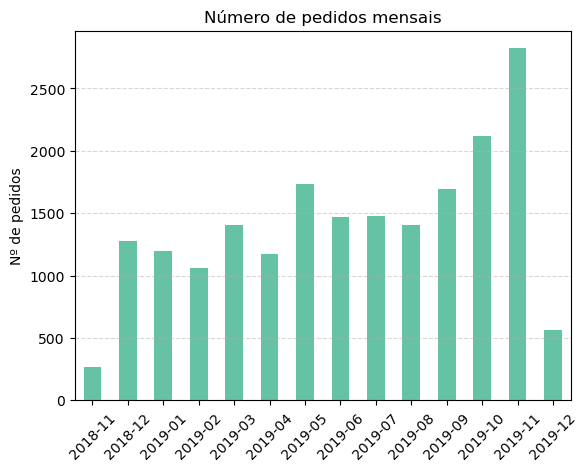

In [46]:
# Plota o gráfico com o número de pedidos realizados por mês.
cohort_order_month.groupby('Month')['InvoiceNo'].count().plot(kind='bar', color='#66c2a5')
plt.title('Número de pedidos mensais')
plt.xlabel('')
plt.ylabel('Nº de pedidos')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

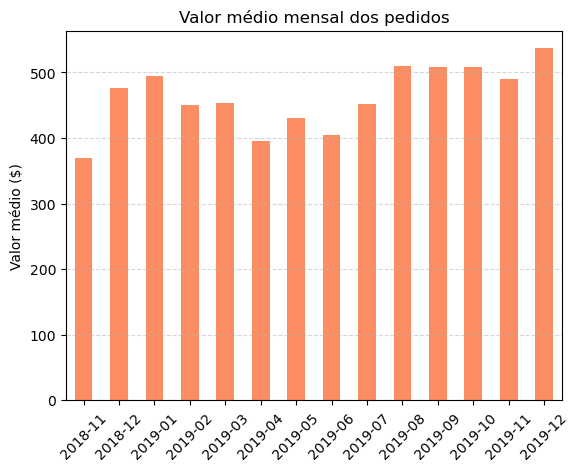

In [47]:
# Plota o gráfico com o valor médio dos pedidos realizados por mês.
cohort_order_month.groupby('Month')['TotalPrice'].mean().plot(kind='bar', color='#fc8d62')
plt.title('Valor médio mensal dos pedidos')
plt.xlabel('')
plt.ylabel('Valor médio ($)')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Em um primeiro momento, observamos que o maior número de compras realmente foi realizado ao final do período de estudo, no mês de novembro de 2019, atingindo quase 3.000 compras registradas naqueles mês. O segundo mês com mais compras do estudo, e o primeiro a superar a marca de 2.000 compras mensais, foi o mês anterior, de outubro de 2019.

Em termos de valor médio das compras no recorte mensal, o mês de dezembro de 2019 foi o que apresentou maior valor, atingindo quase $550 por pedido, apesar de apenas parte dele compor o período do estudo. Em destaque, os meses de agosto, setembro e outubro do mesmo ano também apresentaram um número significativo no valor médio de compras no período.

Já novembro de 2019, mês que teve o maior número de compras totais, também apresentou bons números no valor médio das compras.

### 3.1 Segmentação de perfis de compras

Para a próxima análise, iremos observar o comportamento dos usuários na plataforma, dentre horários de compras e dias da semana que demandam maior fluxo de pedidos.

In [48]:
# Obtém o valor inicial das informações de cada pedido.
df_grouped = df_final.groupby('InvoiceNo').first()

# Remove colunas que não contém dados temporais das compras.
df_grouped = df_grouped.drop(columns=['StockCode', 'Description', 'Quantity', 'UnitPrice'])

# Calcula o valor total de cada compra única.
df_grouped['TotalPrice'] = df_final.groupby('InvoiceNo')['TotalPrice'].sum()

In [49]:
# Observação dos dados isolados
df_grouped.head()

,CustomerID,TotalPrice,Date,Hour,WeekDay,Month
InvoiceNo,,,,,,
536365,17850,139.12,2018-11-29,8,3,2018-11
536366,17850,22.20,2018-11-29,8,3,2018-11
536367,13047,278.73,2018-11-29,8,3,2018-11
536368,13047,70.05,2018-11-29,8,3,2018-11
536369,13047,17.85,2018-11-29,8,3,2018-11


Separaremos coortes contendo informações sobre os horários das compras, dias da semana e os meses do ano, contando o número total de pedidos feitos naquele período e o número de usuários unívocos que realizaram as compras.

In [50]:
# Separa coortes de hora, dia da semana e mês dos pedidos. Conta o nº de pedidos feitos e o nº de usuários distintos.
cohort_hour = df_grouped.groupby('Hour').agg({'CustomerID': ['count', 'nunique']})
cohort_wday = df_grouped.groupby('WeekDay').agg({'CustomerID': ['count', 'nunique']})
cohort_month = df_grouped.groupby('Month').agg({'CustomerID': ['count', 'nunique']})

In [51]:
# Ajusta os nomes das colunas.
cohort_hour.columns = ['n_orders', 'n_users']
cohort_wday.columns = ['n_orders', 'n_users']
cohort_month.columns = ['n_orders', 'n_users']

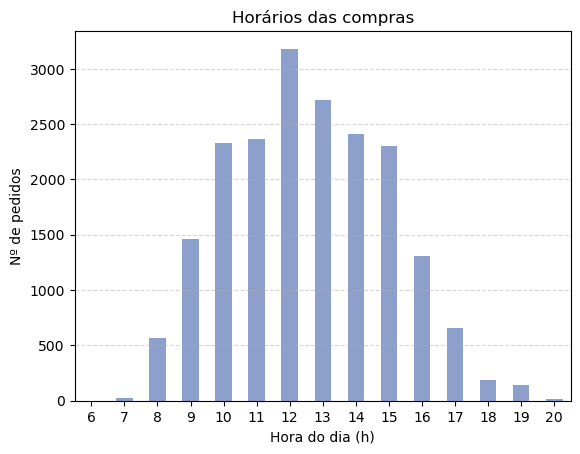

In [52]:
# Plota o gráfico referente ao número de pedidos para cada hora do dia.
cohort_hour['n_orders'].plot(kind='bar', color='#8da0cb')
plt.title('Horários das compras')
plt.xlabel('Hora do dia (h)')
plt.ylabel('Nº de pedidos')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Analisando o comportamento dos usuários na plataforma em relação ao horário das compras, observamos que o maior número de pedidos foi realizado às 12h, superando a marcar de 3.000 compras feitas nesse horário. O segundo horário com mais compras foi às 13h, determinando que a maioria dos pedidos são realizados no intervalo de almoço dos usuários.

Outro detalhe notável é que as compras foram feitas entre às 6h e 21h. Não existem pedidos feitos durante tarde da noite ou durante a madrugada.

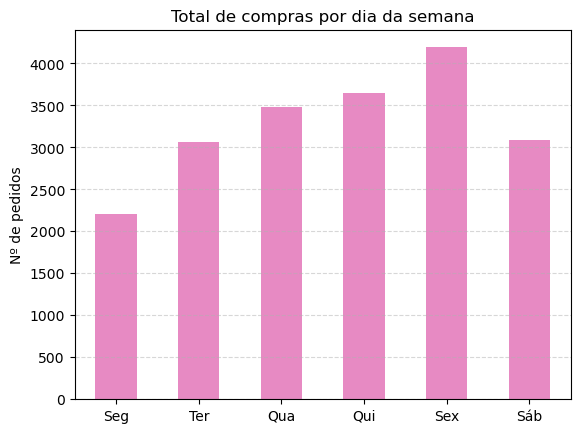

In [53]:
# Plota o gráfico referente ao número de pedidos por dia da semana.
cohort_wday['n_orders'].plot(kind='bar', color='#e78ac3')
plt.title('Total de compras por dia da semana')
plt.xlabel('')
plt.ylabel('Nº de pedidos')

plt.xticks(ticks=cohort_wday.index, labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0) # Define os dias da semana como rótulos de x.
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Em relação aos dias das compras, sexta-feira superou a marca de 4.000 pedidos realizados naquele dia da semana, sendo o dia de maior demanda dos usuários. Podemos determinar que os usuários deixam para realizar mais compras entre quarta e sexta-feira, efetuando poucas compras na segunda-feira. Sábado apresenta valores superiores a 3.000 compras diárias, registrando demanda razoável da plataforma, assim como quarta-feira.

Cabe destacar que não temos registros de compras realizadas no domingo em nosso conjunto de dados.

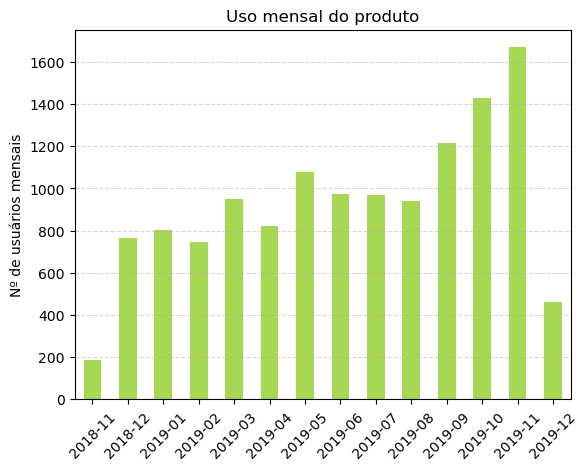

In [54]:
# Plota o gráfico referente ao número de usuários distintos por mês.
cohort_month['n_users'].plot(kind='bar', color='#a6d854')
plt.title('Uso mensal do produto')
plt.xlabel('')
plt.ylabel('Nº de usuários mensais')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Mais uma vez identificamos que o grande número de compras dos usuários é observado no mês de novembro de 2019. No caso em tela, esse mês registrou a maior quantidade de compras de usuários distintos, rerpesentando a maior quantidade de acessos dos usuários à plataforma. Entre os meses de junho e agosto, notamos também uma queda na quantidade de usuários distintos que realizaram compras.

Para a sequência da análise, utilizaremos parte do conjunto de dados, removendo os usuários que não contêm registro de identificação. Conforme trabalhamos com informações específicas de cada usuário, estando o número de identificação do usuário ausente, faz-se necessário o descarte desses usuários para o decorrer do estudo.

In [55]:
# Remove usuários que não contêm registro de identificação.
df_orders = df_grouped[df_grouped['CustomerID']!=0]
df_orders.reset_index(inplace=True)

In [56]:
# Captura o primeiro dia de compra de cada usuário.
first_order = df_orders.groupby('CustomerID')['Date'].min()

In [57]:
# Registra a informação do primeiro dia de compra na tabela de dados.
df_orders = df_orders.join(first_order.rename('FirstOrder'), on='CustomerID').drop_duplicates()

In [58]:
# Observação geral dos dados
df_orders.head()

,InvoiceNo,CustomerID,TotalPrice,Date,Hour,WeekDay,Month,FirstOrder
0,536365,17850,139.12,2018-11-29,8,3,2018-11,2018-11-29
1,536366,17850,22.20,2018-11-29,8,3,2018-11,2018-11-29
2,536367,13047,278.73,2018-11-29,8,3,2018-11,2018-11-29
3,536368,13047,70.05,2018-11-29,8,3,2018-11,2018-11-29
4,536369,13047,17.85,2018-11-29,8,3,2018-11,2018-11-29


### 3.2 Lifetime Value (LTV) dos usuários

O lifetime value (LTV) identifica a fidelização dos clientes à plataforma. Ele registra o ciclo de vida do cliente, representando o valor gerado por cada perfil de cliente que utiliza o sistema, abrindo a possibilidade de criarmos produtos e programas de fidelidade para clientes que consomem mais produtos.

Para essa análise, iremos separar os perfis de clientes em relação à data de sua primeira compra, identificando mensalmente o valor gerado durante o período em estudo.

In [59]:
# Calcula o lifetime value (LTV) médio dos clientes
ltv = df_orders.groupby('CustomerID')['TotalPrice'].sum().mean()
print(f'Lifetime Value (LTV) médio dos clientes: ${ltv:.2f}')

Lifetime Value (LTV) médio dos clientes: $1805.24


In [60]:
# Calcula o LTV gerado por cada cliente. Vamos gerar uma tabela com esses dados.
ltv_customers = df_orders.groupby('CustomerID')['TotalPrice'].sum().reset_index()
ltv_customers.head()

,CustomerID,TotalPrice
0,12347,4310.00
1,12348,1437.24
2,12349,1457.55
3,12350,294.40
4,12352,1385.74


In [61]:
# Separa o primeiro mês de compra do cliente.
first_month = df_orders.groupby('CustomerID')['Month'].min().reset_index()
first_month.head()

,CustomerID,Month
0,12347,2018-12
1,12348,2018-12
2,12349,2019-11
3,12350,2019-01
4,12352,2019-02


In [62]:
# Realiza o merge entre as tabelas.
ltv_customers = ltv_customers.merge(first_month, on='CustomerID')
ltv_customers.head()

,CustomerID,TotalPrice,Month
0,12347,4310.00,2018-12
1,12348,1437.24,2018-12
2,12349,1457.55,2019-11
3,12350,294.40,2019-01
4,12352,1385.74,2019-02


In [63]:
# Agrupa e calcula o LTV médio do grupo de clientes de cada mês.
ltv_month = ltv_customers.groupby('Month')['TotalPrice'].mean().reset_index()
ltv_month.head()

,Month,TotalPrice
0,2018-11,5785.276310
1,2018-12,4092.741165
2,2019-01,2253.750919
3,2019-02,1472.161880
4,2019-03,1385.697488


In [64]:
# Ajusta a identificação do período para o formato de comparação.
ltv_month['Month'] = ltv_month['Month'].dt.strftime('%m-%Y')

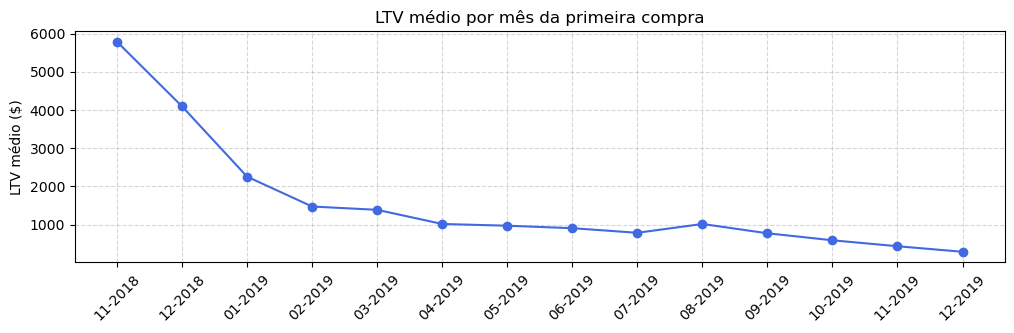

In [65]:
# Plota a distribuição do LTV médio mensal pelo mês da primeira compra.
plt.figure(figsize=(12, 3))
plt.plot(ltv_month['Month'], ltv_month['TotalPrice'], marker='o', color='royalblue')

plt.title('LTV médio por mês da primeira compra')
plt.xlabel('')
plt.ylabel('LTV médio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

Em uma observação inicial dos dados de LTV, vimos que o LTV médio gerado pelos clientes da plataforma foi de cerca de $1.800 no período.

Em termos de distribuição de perfil pelo primeiro mês de compra de cada cliente, os usuários que realizaram a primeira compra em novembro de 2018 registraram quase 6.000 de LTV, sendo o perfil de grande destaque da plataforma. No mês seguinte, os usuários que realizaram a primeira compra registraram um LTV de 4.000. Os valores passam a cair conforme os usuários realizam sua primeira compra ao longo dos meses, se mantendo constante em torno dos 1.000 de LTV a partir de abril de 2019.

In [66]:
# Ajusta o nome da tabela do primeiro mês de compra.
first_month = first_month.rename(columns={'Month': 'FirstMonth'})
first_month.head()

,CustomerID,FirstMonth
0,12347,2018-12
1,12348,2018-12
2,12349,2019-11
3,12350,2019-01
4,12352,2019-02


In [67]:
# Realiza o merge do primeiro mês na tabela de pedidos.
df_orders = df_orders.merge(first_month, on='CustomerID')

In [68]:
df_orders.head()

,InvoiceNo,CustomerID,TotalPrice,Date,Hour,WeekDay,Month,FirstOrder,FirstMonth
0,536365,17850,139.12,2018-11-29,8,3,2018-11,2018-11-29,2018-11
1,536366,17850,22.20,2018-11-29,8,3,2018-11,2018-11-29,2018-11
2,536367,13047,278.73,2018-11-29,8,3,2018-11,2018-11-29,2018-11
3,536368,13047,70.05,2018-11-29,8,3,2018-11,2018-11-29,2018-11
4,536369,13047,17.85,2018-11-29,8,3,2018-11,2018-11-29,2018-11


In [69]:
# Cria uma coluna para a diferença entre o mês da atual compra e o primeiro mês.
df_orders['Age'] = df_orders['Month'].astype('int64') - df_orders['FirstMonth'].astype('int64')

In [70]:
# Gera os tamanhos de coorte para cada primeiro mês de compra.
cohort_sizes = df_orders.groupby('FirstMonth').agg({'CustomerID': 'nunique'}).reset_index()
cohort_sizes = cohort_sizes.rename(columns={'CustomerID': 'Customers'})

In [71]:
# Separa as coortes por mês da primeira compra e soma sua receita após cada mês.
cohorts = df_orders.groupby(['FirstMonth', 'Age']).agg({'TotalPrice': 'sum'}).reset_index()

In [72]:
# Merge com o tamanho das coortes para calcular o LTV. Cria uma tabela do relatório.
report = cohorts.merge(cohort_sizes, on='FirstMonth')

# Calcula o LTV acumulado para cada mês.
report['LTV'] = report['TotalPrice'] / report['Customers']

In [73]:
# Gera uma pivot table com os dados do LTV por coorte.
result = report.pivot_table(
    index='FirstMonth',
    columns='Age',
    values='LTV',
    aggfunc='mean'
).cumsum(axis=1)

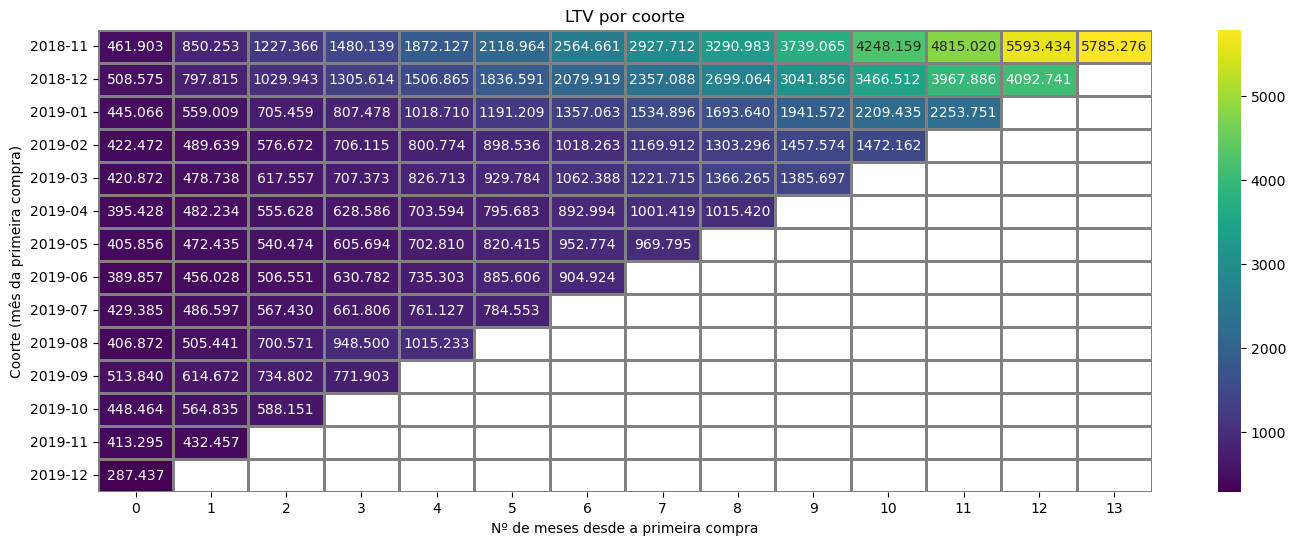

In [74]:
# Plota o gráfico de LTV por coorte em um heatmap.
plt.figure(figsize=(17, 6))
sns.heatmap(result, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap='viridis')
plt.title("LTV por coorte")
plt.xlabel("Nº de meses desde a primeira compra")
plt.ylabel("Coorte (mês da primeira compra)")
plt.show()

No cálculo do LTV médio gerado pelo perfil de clientes que realizaram sua primeira compra por cada mês, observamos novamente que os clientes que realizaram a primeira compra em **novembro de 2018** geraram maior valor para o negócio, com um LTV médio de $5.785 gerado por cliente ao final do estudo.

Já em relação ao melhor LTV médio gerado em seu primeiro mês, os clientes que realizaram a primeira compra em setembro de 2019 produziram o melhor valor inicial, de cerca de $513 por cada usuário. Porém, em observação ao segundo mês, os clientes de novembro e dezembro de 2018 ainda mantiveram destaque. Os clientes de novembro de 2018 **aumentaram em cerca de 84%** o seu LTV médio do primeiro para o segundo mês de compras.

---

## 4. Análise RFM (Recência, Frequência e Monetário)

A análise RFM é uma técnica de segmentação de clientes que quando aplicada nos ajuda a entender o comportamento de compras dos clientes com base em três métricas: **Recência** (quão recente foi a última compra do cliente), **Frequência** (quantas compras o cliente realizou no período aplicado) e Valor **Monetário** (quanto o cliente gastou no mesmo período).

Por meio desses três fatores principais, podemos detectar quantitativamente quais clientes são os melhores, sendo capazes de segmentar o grupo de clientes e identificar diversos perfis, tais como: clientes campeões, clientes fieis, recentes, potenciais fieis, clientes em risco, dentre outros.

In [75]:
# Agrupa os dados para cada cliente, marcando a data mais recente de compra, contagem de pedidos e o somatório de valor dos pedidos.
rfm = df_orders.groupby('CustomerID').agg({
    'Date': 'last',
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

# Renomeia as colunas do quadro RFM.
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [76]:
# Utiliza qcut para separar os valores em quantis e categorizá-los por label.
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int) # Quanto menor o valor, melhor a classificação
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

In [77]:
# Concatena os valores em uma string com a atribuição de RFM.
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [78]:
# Apresenta o quadro RFM ordenado.
rfm.sort_values(by='RFM', ascending=False).head(10)

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
15235,2019-05-04,12,2247.51,5,5,5,555
17504,2019-05-15,9,2997.03,5,5,5,555
18231,2019-05-29,5,2071.77,5,5,5,555
17850,2018-11-30,34,5391.21,5,5,5,555
17230,2019-03-18,8,3638.41,5,5,5,555
13093,2019-03-07,8,7832.47,5,5,5,555
12868,2019-06-05,6,1607.06,5,5,4,554
15508,2019-06-01,6,1000.27,5,5,4,554
18239,2019-05-03,5,1561.61,5,5,4,554


Como podemos observar no quadro acima, temos 6 clientes que fazem parte do perfil campeão: clientes que compraram recentemente (estão ativos), compram com frequência e gastam muito nos pedidos. Esses são os clientes sobre os quais podemos trabalhar ofertas exclusivas, programas especiais e até mesmo disponibilizar produtos novos e exclusivos inicialmente para eles, como forma de manter a fidelidade desses clientes.

Cada grupo de clientes classificados pelo valor de RFM representa um perfil específico de comportamento. Cabe apresentar os grupos e valores ao departamento de marketing para identificar estratégias de manutenção ou reaproximação, a depender do comportamento de cada perfil.

### 4.1 Faixa de elite (da análise RFM)

Como exemplo, vamos definir um perfil de elite dentre os clientes do quadro da análise RFM. Para isso, atribuíremos ao grupo de elite clientes que contêm valores iguais ou maiores a 4 nas três categorias, ou seja, em todas as dimensões da análise.

In [79]:
# Filtra valores de R, F e M iguais ou maiores que 4.
rfm_filter = rfm[(rfm['R'] >= 4) & (rfm['F'] >= 4) & (rfm['M'] >= 4)]

In [80]:
# Cria a tabela com as informações a serem trabalhadas na análise do grupo.
df_mode = (
    df_orders[['CustomerID', 'Hour', 'WeekDay', 'Month', 'FirstOrder', 'FirstMonth']]
    .groupby('CustomerID')
    .agg(lambda x: x.mode().iat[0]) # Valor mais frequente de cada coluna em cada grupo. iat[0] garante o primeiro valor em caso de empate.
    .reset_index()
)

In [81]:
# Junta as informações obtidas com a faixa de clientes de elite.
rfm_filter = rfm_filter.merge(df_mode, how='left', on='CustomerID')

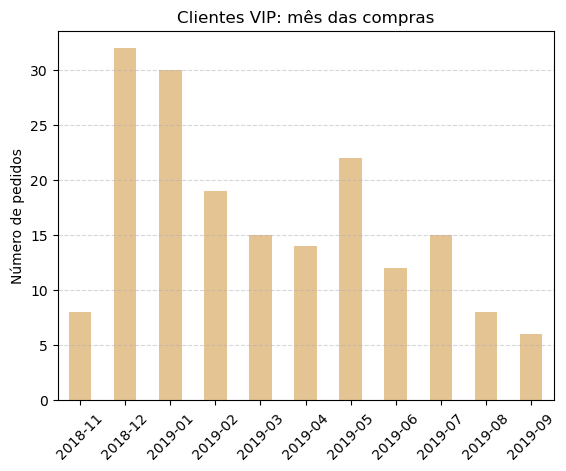

In [82]:
# Plota o gráfico dos meses de compras dos pedidos VIP.
rfm_filter.groupby('Month')['CustomerID'].count().plot(kind='bar', color='#e5c494')
plt.title('Clientes VIP: mês das compras')
plt.xlabel('')
plt.ylabel('Número de pedidos')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

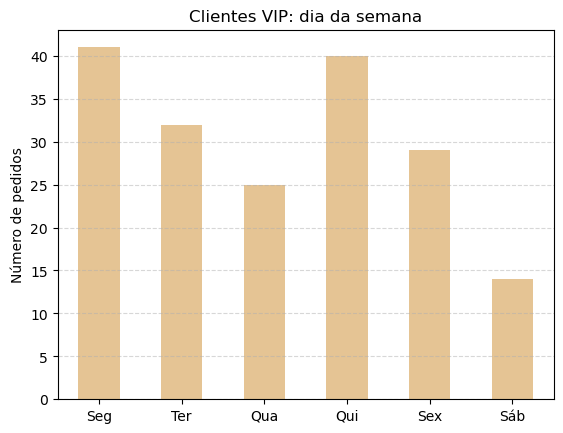

In [83]:
# Plota o gráfico dos dias da semana dos pedidos VIP.
rfm_filter.groupby('WeekDay')['CustomerID'].count().plot(kind='bar', color='#e5c494')
plt.title('Clientes VIP: dia da semana')
plt.xlabel('')
plt.ylabel('Número de pedidos')

plt.xticks(ticks=cohort_wday.index, labels=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0) # Define os dias da semana como rótulos de x.
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

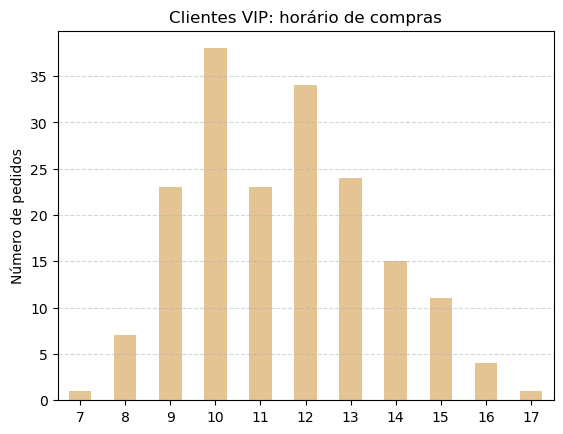

In [84]:
# Plota o gráfico dos horários de compras dos pedidos VIP.
rfm_filter.groupby('Hour')['CustomerID'].count().plot(kind='bar', color='#e5c494')
plt.title('Clientes VIP: horário de compras')
plt.xlabel('')
plt.ylabel('Número de pedidos')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Sendo assim, podemos identificar que os clientes da nossa faixa de elite efetuaram a maior parte das compras nos meses de dezembro de 2018 e janeiro de 2019 (em períodos festivos). O dia da semana com maior quantidade de compras desses clientes foi segunda-feira, divergindo da informação obtida anteriormente de que os clientes em geral fazem menos compras na segunda, seguido pela quinta-feira.

Em relação aos horários de compras, os clientes da faixa de elite fazem mais compras de manhã, por volta das 10h da manhã. O segundo horário com mais compras é o mesmo dos demais clientes em geral: meio-dia (ou 12h).

Com essas informações em mãos, podemos trabalhar ofertas exclusivas a serem lançadas para a faixa de elite às 10h de segunda-feira, horário e data em que esses clientes fazem mais compras dentro da plataforma. Ou que tal na quinta-feira ao meio-dia? Podemos transmitir essas informações ao departamento de marketing para planejar o procedimento ideal para a divulgação dessas promoções.

---

## 5. Testes de hipóteses

Para finalizar nossa análise, vamos aplicar algumas hipóteses ao conjunto de dados e observar se existem grandes divergências dentre os grupos de amostras.

- **Hipótese 1:** Não há diferença no volume médio de compras dos clientes registrados nos primeiros 7 meses do estudo e os registrados nos últimos 7 meses.
- **Hipótese 2:** Não há diferença no volume médio entre as compras feitas de manhã e as feitas à tarde.
- **Hipótese 3:** Não há diferença no volume médio entre as compras feitas para as festas de fim de ano e as feitas no restante do ano.

Inicialmente, vamos identificar se o agrupamento de dados registra uma distribuição normal ou assimétrica, observando o gráfico de distribuição abaixo referente ao preço total dos pedidos do conjunto de dados.

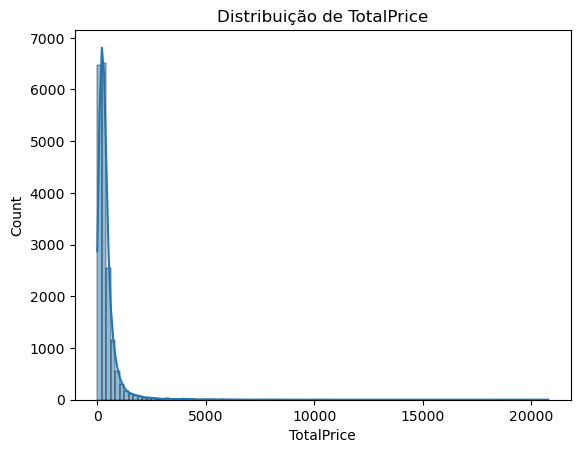

In [85]:
sns.histplot(df_orders['TotalPrice'], kde=True, bins=100)
plt.title('Distribuição de TotalPrice')
plt.show()

Por conta da dispersão entre os valores totais de compra de cada cliente, observamos que nossa distribuição é fortemente assimétrica à direita, contendo valores muito próximos de zero e pouquíssimos valores mais altos. Portanto, temos uma distribuição não normal e trabalharemos para as hipóteses a seguir o Teste U de Mann-Whitney, para verificar se as amostras de cada hipótese apresentada são significativamente diferentes.

### 5.1 Hipótese 1: Não há diferença no volume médio de compras dos clientes registrados nos primeiros 7 meses do estudo e os registrados nos últimos 7 meses.

In [86]:
# Importa a biblioteca do teste U de Mann-Whitney.
from scipy.stats import mannwhitneyu

alpha = .05 # Atribui o valor de 5% para o nível de significância dos testes.

In [87]:
# Separa as amostras entre os 7 primeiros meses e o 7 últimos meses do estudo.
first_months = df_orders[df_orders['FirstOrder']<'2019-06-01']['TotalPrice']
last_months = df_orders[df_orders['FirstOrder']>='2019-06-01']['TotalPrice']

# Aplica o teste U de Mann-Whitney para ambas amostras.
results = mannwhitneyu(first_months, last_months, alternative='two-sided')

# Imprime o valor-p do teste.
print('p-value:', results.pvalue)

# Compara o valor-p com o nível de significância para avaliar a hipótese.
if (results.pvalue < alpha):
    print('Rejeitamos H₀: há diferença significativa entre as proporções')
else:
    print('Não rejeitamos H₀: não há diferença significativa')

p-value: 6.238426493544108e-09
Rejeitamos H₀: há diferença significativa entre as proporções


### 5.2 Hipótese 2: Não há diferença no volume médio entre as compras feitas de manhã e as feitas à tarde.

In [88]:
# Separa as amostras entre os 7 primeiros meses e o 7 últimos meses do estudo.
morning_clients = df_orders[df_orders['Hour']<12]['TotalPrice']
afternoon_clients = df_orders[(df_orders['Hour']>=12) & (df_orders['Hour']<18)]['TotalPrice']

# Aplica o teste U de Mann-Whitney para ambas amostras.
results = mannwhitneyu(morning_clients, afternoon_clients, alternative='two-sided')

# Imprime o valor-p do teste.
print('p-value:', results.pvalue)

# Compara o valor-p com o nível de significância para avaliar a hipótese.
if (results.pvalue < alpha):
    print('Rejeitamos H₀: há diferença significativa entre as proporções')
else:
    print('Não rejeitamos H₀: não há diferença significativa')

p-value: 2.130300519614081e-13
Rejeitamos H₀: há diferença significativa entre as proporções


### 5.3 Hipótese 3: Não há diferença no volume médio entre as compras feitas para as festas de fim de ano e as feitas no restante do ano.

In [89]:
# Separa as amostras entre os 7 primeiros meses e o 7 últimos meses do estudo.
end_of_year = df_orders[(df_orders['Month']=='12-2018') | (df_orders['Month']=='12-2019')]['TotalPrice']
rest_of_year = df_orders.drop(end_of_year.index)['TotalPrice']

# Aplica o teste U de Mann-Whitney para ambas amostras.
results = mannwhitneyu(end_of_year, rest_of_year, alternative='two-sided')

# Imprime o valor-p do teste.
print('p-value:', results.pvalue)

# Compara o valor-p com o nível de significância para avaliar a hipótese.
if (results.pvalue < alpha):
    print('Rejeitamos H₀: há diferença significativa entre as proporções')
else:
    print('Não rejeitamos H₀: não há diferença significativa')

p-value: 5.156652001680192e-05
Rejeitamos H₀: há diferença significativa entre as proporções


Como retornado nos três testes de hipótese executados acima, os valores médios das amostras são muito divergentes e apresentaram diferença estatisticamente significativa entre as médias das amostras em todos os testes.

Como os valores médios de compras dos clientes possuem grande amplitude e o conjunto de dados apresenta uma imensa quantidade de valores, torna-se complexo mensurar estatisticamente a semelhança no comportamente entre os grupos. Além disso, para futuras análises seria ideal observar a influência de novas implementações por meio de testes A/B, para definir o poder de interferência delas sobre o número de compras dos clientes de cada grupo.

---

## 6. Conclusão Geral

O aspecto de vendas no período que compreende novembro de 2018 a dezembro de 2019 foi de crescimento para as vendas na plataforma de e-commerce da Uhul Store. Os números de venda subiram nos últimos meses, em grande parte representandos pelos clientes mais antigos e em boa parte pelo surgimento de novos clientes no meio de 2019. Os números de vendas no final de 2019 tiveram grande destaque e apresentaram ótima tendência de vendas, com nova prospecção de crescimento durante o final desse ano.

O LTV médio gerado pelos clientes também apresentou retorno considerável para a empresa. Os clientes que realizaram suas primeiras compras em novembro e dezembro de 2018 foram os que mais geraram receita para a loja ao longo do período. Recomendamos ao departamento de marketing campanhas relacionadas a promoções e ofertas exclusivas para a manutenção da fidelidade desse grupo de clientes.

Em relação ao compartamento dos usuários, observamos que a grande maioria prefere realizar suas compras entre quarta e sexta-feira, preferencialmente no horário do almoço, que abrange horários entre 12h e 14h. Portanto, campanhas de vendas podem ser voltadas para esse período, incentivando o consumo dos clientes durante o uso da plataforma nesse horário.

Analisando o grupo de clientes definidos como "faixa de elite", esses usuários ativos, fieis e que gastam mais costumam realizar suas compras às terças e quintas-feiras, nos horários de 10h e 12h. Essa informação também determina a execução de programas de fidelidade voltados para a manutenção desse espectro de clientes, que são os que trazem mais retorno atualmente para o negócio.

Portanto, podemos concluir que a plataforma apresenta tendência de evolução, observado o crescimento nas vendas ao final do estudo. Apesar disso, os grupos de comportamento dos clientes ainda são dispersos, com alguns clientes específicos elevando os números do negócio. Dessa forma, recomendamos ao departamento de marketing a promoção de campanhas para cativar os clientes que menos frequentam a plataforma, a fim de uniformizar o comportamento dos usuários e fortalecer as vendas e o lucro do negócio para o próximo período.

---

## 7. Referências bibliográficas

- https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-with-z-score/: remoção de outliers usando o método estatístico `z-score`, com o qual removemos valores que se distanciam da média do conjunto padrão de dados por meio do cálculo do desvio-padrão.

- https://edrone.me/pt/blog/customer-lifetime-value: entendimento e aplicação da métrica de lifetime value (LTV) aos dados de compras dos usuários, calculando o valor médio gerado por cada usuário ao longo do período do estudo.

- https://edrone.me/pt/blog/analise-de-rfm-para-e-commerce: a referência foi utilizada para aplicação da análise RFM no projeto, com o intuito de categorizar grupos de clientes com base no comportamento de compras na plataforma.

- https://1fabiana-souza.medium.com/entendendo-o-m%C3%A9todo-qcut-0dc63f575f4e: aplicação do método `qcut()` para separação, em quantis, da categorização das métricas utilizadas na análise RFM do projeto.

- https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425: observação de distribuições de dados e identificação da aplicação do Teste U de Mann-Whitney para o teste de hipóteses da análise.

- https://medium.com/@robert.j.breen/how-to-count-the-number-of-records-in-tableau-4263cf388dc4: artigo utilizado para entender e decifrar a apresentação de dados no dashboard do material, de forma a apresentar valores gerais fora dos gráficos da tela.